In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
%matplotlib inline
sns.set()

attendance_df = pd.read_csv('../data/matches_transformed.csv', sep=',')

## Features - Target - Split
X = attendance_df.drop('attendance', axis=1)
y = attendance_df['attendance']

## Test - Train - Split

X_train, X_test, y_train, y_test, = train_test_split(
    X,
    y,
    train_size=2/3, random_state=1234)

In [16]:
## Features standardisieren
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_sc = scaler.transform(X_train)
X_test_sc = scaler.transform(X_test)

0.8263031904840301


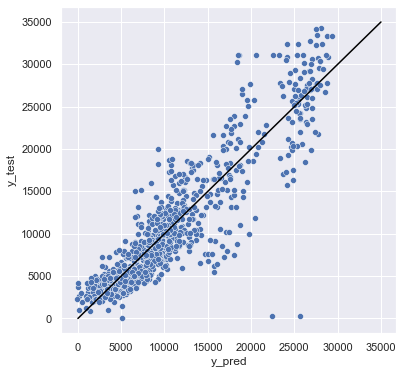

In [20]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_sc, y_train)
print(model.score(X_test_sc, y_test))
y_pred = model.predict(X_test_sc)
plt.figure(figsize=(6,6))
ax = sns.scatterplot(x=y_pred, y=y_test)
ax.set(xlabel='y_pred', ylabel='y_test')
ls = np.linspace(0, 35000, 100)
plt.plot(ls, ls, color='black')
plt.show()